In [ ]:
import sys
sys.path.insert(0, '../scripts')
from load_data_df import *
import matplotlib.gridspec as gridspec

# Data Paths

In [2]:
# AES
tjfree_aes_data_dir = '/Users/ti27457/Repos/ttb/circuits/aes/tjfree_75eds'
mal_aes_data_dir    = '/Users/ti27457/Repos/ttb/circuits/aes/mal_75eds'

# UART
tjfree_uart_data_dir = '/Users/ti27457/Repos/ttb/circuits/uart/tjfree_16bytes'
mal_uart_data_dir    = '/Users/ti27457/Repos/ttb/circuits/uart/mal_16bytes'

# OR1200
tjfree_or1200_data_dir = '/Users/ti27457/Repos/ttb/circuits/or1200/tjfree_combined'
mal_or1200_data_dir    = '/Users/ti27457/Repos/ttb/circuits/or1200/mal_combined'

# Plot Settings

In [3]:
# Plot Settings
FIG_WIDTH          = 9
FIG_HEIGHT         = 4
LINE_WIDTH         = 2
HIST_SAVE_AS_PDF   = True
AES_SAVE_AS_PDF    = True
UART_SAVE_AS_PDF   = True
OR1200_SAVE_AS_PDF = True

# Plot PDF Filenames
# HIST_PDF_FILENAME      = 'cntr_sizes_histogram.pdf'
AES_PDF_FILENAME    = 'aes-75tests-100res-100ps-2x.pdf'
UART_PDF_FILENAME   = 'uart-1tests-10000res-100ps-2x.pdf'
OR1200_PDF_FILENAME = 'or1200-1tests-100000res-100ps-combined-2x.pdf'

# Plot Function

In [4]:
def plot_counter_fps(tjfree_dir, mal_dir, epochs, y_lims, pdf_fname, save_as_pdf=False):
    tjfree_df = load_data_df_wf(tjfree_dir)
    mal_df    = load_data_df_wf(mal_dir)
    
    # Plot Data
    sns.set()
    plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
    gs = gridspec.GridSpec(2, len(epochs) - 1)
    gs.update(wspace=0.1, hspace=0.2) # set the spacing between axes. 
    main_ax = plt.subplot(gs[0, :])

    # Plot Data in Pane 1
    # sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)
    # sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)
    sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=mal_df,    ax=main_ax, linewidth=LINE_WIDTH)
    sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=mal_df,    ax=main_ax, linewidth=LINE_WIDTH)
    sns.lineplot(x="Time", y="Coalesced Constants",               data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)
    sns.lineplot(x="Time", y="Distributed Constants",             data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)

    # Format Plot in Pane 1
    main_ax.set_xlim(0, epochs[-1])
    main_ax.set_xlabel('')
    main_ax.set_xlabel('')
    main_ax.set_ylabel('# Counters')
    # main_ax.get_xaxis().set_ticks([])
    main_ax.get_xaxis().set_ticklabels([])
    for tick in main_ax.get_yticklabels():
        tick.set_rotation(90)

    # Plot remaining panes
    for pane_num in range(len(epochs) - 1):

        # Set Axis
        ax = plt.subplot(gs[1, pane_num])

        # Plot Data
        # sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=tjfree_df, ax=ax, linewidth=LINE_WIDTH)
        # sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=tjfree_df, ax=ax, linewidth=LINE_WIDTH)
        sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=mal_df,    ax=ax, linewidth=LINE_WIDTH)
        sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=mal_df,    ax=ax, linewidth=LINE_WIDTH)
        sns.lineplot(x="Time", y="Coalesced Constants",               data=tjfree_df, ax=ax, linewidth=LINE_WIDTH)
        sns.lineplot(x="Time", y="Distributed Constants",             data=tjfree_df, ax=ax, linewidth=LINE_WIDTH)

        # Format Plot
        ax.set_xlim(epochs[pane_num], epochs[pane_num + 1])
        ax.set_ylim(-y_lims[pane_num]/25.0, y_lims[pane_num])
        if pane_num == 0:
            ax.set_ylabel('# Counters')
        else:
            ax.set_ylabel('')
        ax.set_xlabel('Time (ns)')
    #     ax.grid()
        for tick in ax.get_yticklabels():
            tick.set_rotation(90)

        # # Last Pane
        # ax3.set_ylabel('# Counters')
        # ax3.yaxis.tick_right()
        # ax3.yaxis.set_label_position("right")
        # ax3.set_xlabel('Time (ns)')

    # Set Legend
    main_ax.legend(['Coalesced Malicious','Distributed Malicious','Coalesced Constants','Distributed Constants'])

#     # Add Line Separators to Pane 1
#     for x_coord in epochs:
#         main_ax.axvline(x=x_coord, color='k', linestyle='-')

    # Save as PDF
    if save_as_pdf:
        plt.savefig(pdf_fname, format='pdf', bbox_inches='tight')

# Plot AES False Positives

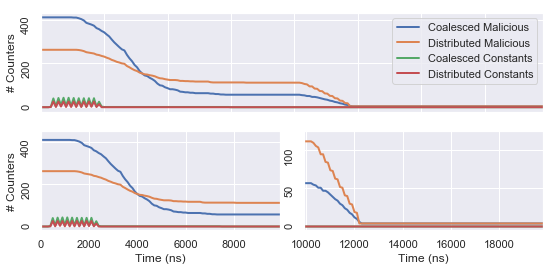

In [9]:
# Load Data
# tjfree_aes_counter_df = load_data_df_wf(tjfree_aes_data_dir)
# mal_aes_counter_df    = load_data_df_wf(mal_aes_data_dir)
epochs                = [0, 9900, 19800]
y_lims                = [450, 125]

plot_counter_fps(tjfree_aes_data_dir, \
                 mal_aes_data_dir, \
                 epochs, \
                 y_lims, \
                 AES_PDF_FILENAME, \
                 AES_SAVE_AS_PDF)

# # Plot Data
# sns.set()
# plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
# gs = gridspec.GridSpec(2, len(test_end_times))
# gs.update(wspace=0.1, hspace=0.2) # set the spacing between axes. 
# main_ax = plt.subplot(gs1[0, :])

# # Plot Data in Pane 1
# # sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=tjfree_aes_counter_df, ax=main_ax, linewidth=LINE_WIDTH)
# # sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=tjfree_aes_counter_df, ax=main_ax, linewidth=LINE_WIDTH)
# sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=mal_aes_counter_df,    ax=main_ax, linewidth=LINE_WIDTH)
# sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=mal_aes_counter_df,    ax=main_ax, linewidth=LINE_WIDTH)
# sns.lineplot(x="Time", y="Coalesced Constants",               data=tjfree_aes_counter_df, ax=main_ax, linewidth=LINE_WIDTH)
# sns.lineplot(x="Time", y="Distributed Constants",             data=tjfree_aes_counter_df, ax=main_ax, linewidth=LINE_WIDTH)

# # Format Plot in Pane 1
# # main_ax.set_ylim(0, 450)
# main_ax.set_xlim(0, epochs[-1])
# # main_ax.grid()
# main_ax.set_xlabel('')
# main_ax.set_xlabel('')
# main_ax.set_ylabel('# Counters')
# # main_ax.get_xaxis().set_ticks([])
# main_ax.get_xaxis().set_ticklabels([])
# for tick in main_ax.get_yticklabels():
#     tick.set_rotation(90)

# # Plot remaining panes
# for pane_num in range(len(epochs) - 1):
    
#     # Set Axis
#     ax = plt.subplot(gs[1, pane_num])
    
#     # Plot Data
#     # sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=tjfree_aes_counter_df, ax=ax, linewidth=LINE_WIDTH)
#     # sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=tjfree_aes_counter_df, ax=ax, linewidth=LINE_WIDTH)
#     sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=mal_aes_counter_df,    ax=ax, linewidth=LINE_WIDTH)
#     sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=mal_aes_counter_df,    ax=ax, linewidth=LINE_WIDTH)
#     sns.lineplot(x="Time", y="Coalesced Constants",               data=tjfree_aes_counter_df, ax=ax, linewidth=LINE_WIDTH)
#     sns.lineplot(x="Time", y="Distributed Constants",             data=tjfree_aes_counter_df, ax=ax, linewidth=LINE_WIDTH)
    
#     # Format Plot
#     ax.set_xlim(epochs[pane_num], epochs[pane_num + 1])
#     ax.set_ylim(-y_lims[pane_num]/25.0, y_lims[pane_num])
# #     ax.set_ylim(auto=True)
#     if pane_num == 0:
#         ax.set_ylabel('# Counters')
#     else:
#         ax.set_ylabel('')
#     ax.set_xlabel('Time (ns)')
# #     ax.grid()
#     for tick in ax.get_yticklabels():
#         tick.set_rotation(90)
    
#     # # Last Pane
#     # ax3.set_ylabel('# Counters')
#     # ax3.yaxis.tick_right()
#     # ax3.yaxis.set_label_position("right")
#     # ax3.set_xlabel('Time (ns)')

# # Set Legend
# main_ax.legend(['Coalesced Malicious','Distributed Malicious','Coalesced Constants','Distributed Constants'])

# # Remove margins in PDF
# # plt.tight_layout(h_pad=-1)

# # Add Line Separators to Pane 1
# for x_coord in epochs:
#     ax1.axvline(x=x_coord, color='k', linestyle='-')

# # Save as PDF
# if AES_FP_SAVE_AS_PDF:
#     plt.savefig(AES_FP_PDF_FILENAME, format='pdf', bbox_inches='tight')

# Plot UART False Positives

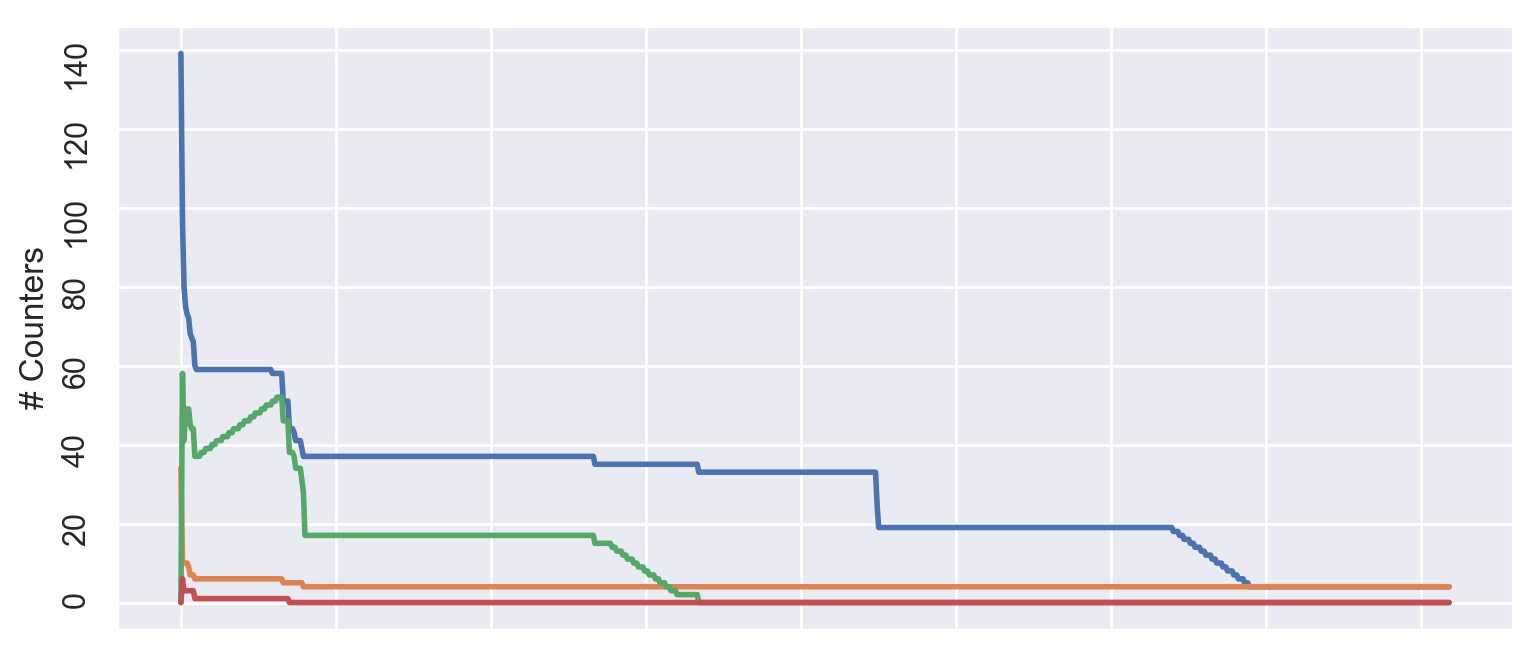

In [12]:
uart_epochs = [0, 12250, 786150, 1349660, 4482460, 5046260, 8179060]
uart_y_lims = [450, 450, 450, 450, 450, 450]
# plot_counter_fps(tjfree_uart_data_dir, \
#                  mal_uart_data_dir, \
#                  uart_epochs, \
#                  uart_y_lims, \
#                  UART_PDF_FILENAME, \
#                  UART_SAVE_AS_PDF)

tjfree_df = load_data_df_wf(tjfree_uart_data_dir)
mal_df    = load_data_df_wf(mal_uart_data_dir)

# Plot Data
sns.set()
fig, main_ax = plt.subplots(1, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)
# plt.subplots(figsize=(FIG_WIDTH, FIG_HEIGHT))
# gs = gridspec.GridSpec(2, len(epochs) - 1)
# gs.update(wspace=0.1, hspace=0.2) # set the spacing between axes. 
# main_ax = plt.subplot(gs[0, :])

# Plot Data in Pane 1
# sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)
# sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs",   data=mal_df,    ax=main_ax, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=mal_df,    ax=main_ax, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Coalesced Constants",               data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)
sns.lineplot(x="Time", y="Distributed Constants",             data=tjfree_df, ax=main_ax, linewidth=LINE_WIDTH)

# Format Plot in Pane 1
# main_ax.set_xlim(0, epochs[-1])
main_ax.set_xlabel('')
main_ax.set_xlabel('')
main_ax.set_ylabel('# Counters')
# main_ax.get_xaxis().set_ticks([])
main_ax.get_xaxis().set_ticklabels([])
for tick in main_ax.get_yticklabels():
    tick.set_rotation(90)
        
# # Load Data
# tjfree_uart_counter_df = load_data_df_wf(tjfree_uart_data_dir)
# mal_uart_counter_df    = load_data_df_wf(mal_uart_data_dir)

# # Plot Data
# fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

# # Set Plot Data
# sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs", data=tjfree_uart_counter_df, ax=ax1)
# sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=tjfree_uart_counter_df, ax=ax1)
# sns.lineplot(x="Time", y="Coalesced Constants", data=tjfree_uart_counter_df, ax=ax1)
# sns.lineplot(x="Time", y="Distributed Constants", data=tjfree_uart_counter_df, ax=ax1)

# sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs", data=mal_uart_counter_df, ax=ax2)
# sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=mal_uart_counter_df, ax=ax2)
# sns.lineplot(x="Time", y="Coalesced Constants", data=mal_uart_counter_df, ax=ax2)
# sns.lineplot(x="Time", y="Distributed Constants", data=mal_uart_counter_df, ax=ax2)

# # Set Title/Axis Labels
# ax1.set_title('Without Trojans')
# ax1.set_ylabel('# Counters')
# ax2.set_xlabel('')
# ax2.get_xaxis().set_ticklabels([])
# ax2.set_title('With Trojans')
# ax2.set_ylabel('# Counters')
# ax1.set_xlabel('Time (ns)')

# # Set Legends
# ax1.legend(['Coalesced Malicious','Distributed Malicious','Coalesced Constants','Distributed Constants'])
# ax2.legend(['Coalesced Malicious','Distributed Malicious','Coalesced Constants','Distributed Constants'])

# # Change Line Thickness
# plt.setp(ax1.lines[0], linewidth=2)
# plt.setp(ax1.lines[1], linewidth=2)
# plt.setp(ax2.lines[0], linewidth=2)
# plt.setp(ax2.lines[1], linewidth=2)

# # Set Grid and Axis Limits
# ax1.grid()
# ax2.grid()
# ax1.set_ylim(0, 150)
# ax2.set_ylim(0, 150)

# plt.tight_layout(h_pad=1)

# # Add Line Separators
# for x_coord in [12250, 786150, 1349660, 4482460, 5046260, 8179060]:
#     ax1.axvline(x=x_coord, color='k', linestyle='-')
#     ax2.axvline(x=x_coord, color='k', linestyle='-')

# # Save as PDF
# if UART_FP_SAVE_AS_PDF:
#     plt.savefig(UART_FP_PDF_FILENAME, format='pdf')

# Plot OR1200 False Positives

In [ ]:
# Load Data
tjfree_or1200_counter_df = load_data_df_wf(tjfree_or1200_data_dir)
mal_or1200_counter_df    = load_data_df_wf(mal_or1200_data_dir)

# Plot Data
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(FIG_WIDTH, FIG_HEIGHT), dpi=200)

# Set Plot Data
sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs", data=tjfree_or1200_counter_df, ax=ax1)
sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=tjfree_or1200_counter_df, ax=ax1)
sns.lineplot(x="Time", y="Coalesced Constants", data=tjfree_or1200_counter_df, ax=ax1)
sns.lineplot(x="Time", y="Distributed Constants", data=tjfree_or1200_counter_df, ax=ax1)

sns.lineplot(x="Time", y="Total Malicious Coalesced Cntrs", data=mal_or1200_counter_df, ax=ax2)
sns.lineplot(x="Time", y="Total Malicious Distributed Cntrs", data=mal_or1200_counter_df, ax=ax2)
sns.lineplot(x="Time", y="Coalesced Constants", data=mal_or1200_counter_df, ax=ax2)
sns.lineplot(x="Time", y="Distributed Constants", data=mal_or1200_counter_df, ax=ax2)

# Set Title/Axis Labels
ax1.set_title('Without Trojans')
ax1.set_ylabel('# Counters')
ax2.set_xlabel('')
ax2.get_xaxis().set_ticklabels([])
ax2.set_title('With Trojans')
ax2.set_ylabel('# Counters')
ax1.set_xlabel('Time (ns)')

# Set Legends
ax1.legend(['Coalesced Malicious','Distributed Malicious','Coalesced Constants','Distributed Constants'])
ax2.legend(['Coalesced Malicious','Distributed Malicious','Coalesced Constants','Distributed Constants'])

# Change Line Thickness
plt.setp(ax1.lines[0], linewidth=2)
plt.setp(ax1.lines[1], linewidth=2)
plt.setp(ax2.lines[0], linewidth=2)
plt.setp(ax2.lines[1], linewidth=2)

# Set Grid and Axis Limits
ax1.grid()
ax2.grid()
ax1.set_ylim(0, 150)
ax2.set_ylim(0, 150)

plt.tight_layout(h_pad=1)

# # Add Line Separators
# for x_coord in [2620900,5241700,7035700,8829700,8898100,8966500,9051700,9136900,9882700,10628500,18361300, 26094100,27429100,28764100,28835900,28907700,28981500,29055300,29127300,29199300]:
#     ax1.axvline(x=x_coord, color='k', linestyle='-')
#     ax2.axvline(x=x_coord, color='k', linestyle='-')

# Save as PDF
if OR1200_FP_SAVE_AS_PDF:
    plt.savefig(OR1200_FP_PDF_FILENAME, format='pdf')